# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout
import tensorflow.keras as tf


import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [2]:
data=pd.read_csv('../input/public-transport-traffic-data-in-france/Travel_titles_validations_in_Paris_and_suburbs.csv')

In [3]:
data.head()

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
0,21/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,1141
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
2,21/07/2019,PARMENTIER,71801.0,TST,97
3,21/07/2019,PEREIRE-LEVALLOIS,71453.0,FGT,53
4,21/07/2019,PERNETY,412687.0,OTHER,36


In [4]:
data.tail()

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
883953,04/09/2019,MONTPARNASSE,74040.0,NOT DEFINED,282
883954,04/09/2019,MOUTON-DUVERNET,73653.0,NAVIGO,2805
883955,04/09/2019,NATION,71673.0,NAVIGO,14377
883956,04/09/2019,NATIONALE,71043.0,NAVIGO,4613
883957,04/09/2019,BEL-AIR,73650.0,IMAGINE R,1019


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            883958 non-null  object 
 1   STATION_NAME    883958 non-null  object 
 2   ID_REFA_LDA     882459 non-null  float64
 3   TITLE_CATEGORY  883958 non-null  object 
 4   NB_VALID        883958 non-null  object 
dtypes: float64(1), object(4)
memory usage: 33.7+ MB


In [6]:
data.shape

(883958, 5)

In [7]:
data.isna().sum()

DATE                 0
STATION_NAME         0
ID_REFA_LDA       1499
TITLE_CATEGORY       0
NB_VALID             0
dtype: int64

In [8]:
data.duplicated().sum()

1241

# Data Cleaning

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

DATE              0
STATION_NAME      0
ID_REFA_LDA       0
TITLE_CATEGORY    0
NB_VALID          0
dtype: int64

In [11]:
data.drop_duplicates(keep='first',inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(881218, 5)

In [14]:
data.query('ID_REFA_LDA == -1')

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
98,21/07/2019,VILLETANEUSE U,-1.0,IMAGINE R,130
99,21/07/2019,PIERREFITTE T11,-1.0,?,Less than 5
100,21/07/2019,DUGNY COURNEUVE,-1.0,AMETHYSTE,11
274,21/07/2019,ROSA PARKS,-1.0,TST,633
1038,19/08/2019,Inconnu,-1.0,OTHER,43
...,...,...,...,...,...
883338,29/08/2019,STAINS CERISAIE,-1.0,FGT,176
883339,29/08/2019,BOURGET T11,-1.0,NAVIGO,1528
883488,29/08/2019,ROSA PARKS,-1.0,AMETHYSTE,142
883489,29/08/2019,ROSA PARKS,-1.0,FGT,441


In [15]:
data.drop(data[data.ID_REFA_LDA == -1].index, inplace=True)

In [16]:
data.shape

(857008, 5)

In [17]:
data.query('NB_VALID == "Less than 5"')

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
15,21/07/2019,PONT-MARIE (CITE DES ARTS),71217.0,DAILY NAVIGO,Less than 5
20,21/07/2019,PORTE DE CLIGNANCOURT,72059.0,NOT DEFINED,Less than 5
24,21/07/2019,PORTE DE SAINT-CLOUD,71084.0,NOT DEFINED,Less than 5
26,21/07/2019,RICHARD LENOIR,73648.0,NOT DEFINED,Less than 5
...,...,...,...,...,...
883870,02/09/2019,VAL-D'ARGENTEUIL,65110.0,DAILY NAVIGO,Less than 5
883876,02/09/2019,VILLENNES-SUR-SEINE,64949.0,?,Less than 5
883888,02/09/2019,CERGY-SAINT-CHRISTOPHE,66858.0,OTHER,Less than 5
883905,02/09/2019,NATION,71673.0,DAILY NAVIGO,Less than 5


In [18]:
data['NB_VALID'] = data['NB_VALID'].replace({'Less than 5' : 5})

In [19]:
data['NB_VALID'] = pd.to_numeric(data.NB_VALID)

# Outliers

In [20]:
q_loww = data["ID_REFA_LDA"].quantile(0.00001)
q_high  = data["ID_REFA_LDA"].quantile(0.99)

data = data[(data["ID_REFA_LDA"] < q_high) & (data["ID_REFA_LDA"] > q_loww)]

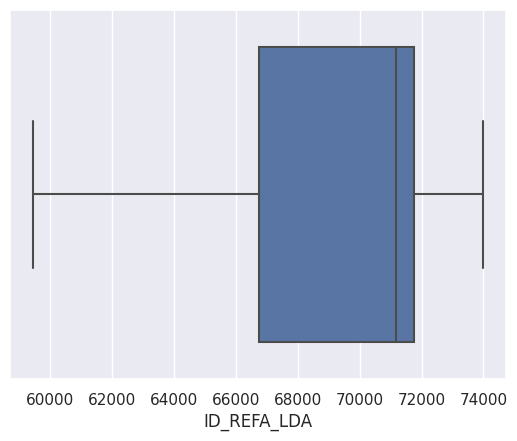

In [21]:
sns.set()
sns.boxplot(data = data , x = data.ID_REFA_LDA);

In [22]:
data['DATE'] = pd.to_datetime(data.DATE)
data['month'] = data['DATE'].dt.month
data['Day'] = data['DATE'].dt.day

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847660 entries, 0 to 883957
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            847660 non-null  datetime64[ns]
 1   STATION_NAME    847660 non-null  object        
 2   ID_REFA_LDA     847660 non-null  float64       
 3   TITLE_CATEGORY  847660 non-null  object        
 4   NB_VALID        847660 non-null  int64         
 5   month           847660 non-null  int32         
 6   Day             847660 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 45.3+ MB


In [24]:
data.describe()

,DATE,ID_REFA_LDA,NB_VALID,month,Day
count,847660,847660.000000,847660.000000,847660.000000,847660.000000
mean,2019-09-25 23:55:53.131207424,69347.075890,771.126769,9.349686,15.739669
min,2019-07-01 00:00:00,59420.000000,5.000000,7.000000,1.000000
25%,2019-08-14 00:00:00,66731.000000,14.000000,8.000000,8.000000
50%,2019-09-27 00:00:00,71184.000000,87.000000,9.000000,16.000000
75%,2019-11-07 00:00:00,71756.000000,379.000000,11.000000,24.000000
max,2019-12-31 00:00:00,74002.000000,125007.000000,12.000000,31.000000
std,NaN,3874.674618,2789.785948,1.622434,8.955057


# Data Analysis

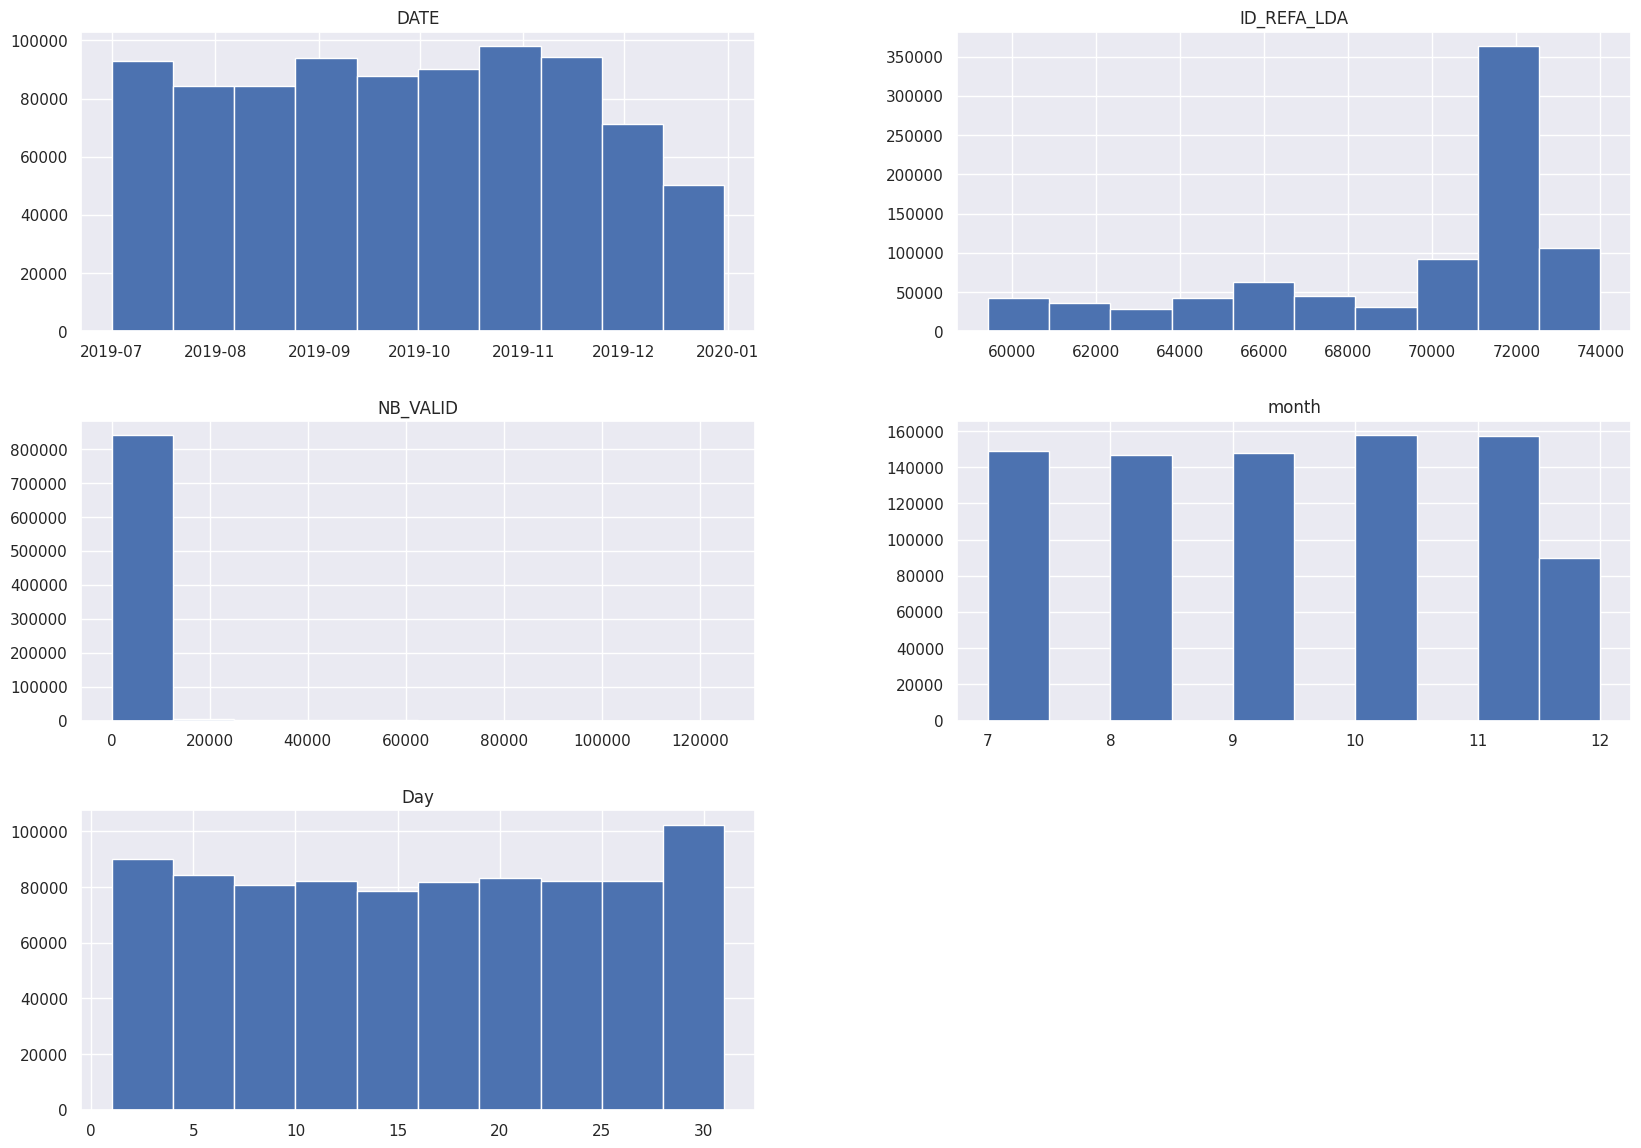

In [25]:
data.hist(figsize=(20,14));

In [26]:
data.groupby(data.month)[['NB_VALID','ID_REFA_LDA']].sum()

,NB_VALID,ID_REFA_LDA
month,,
7,119062443,1.033026e+10
8,90006039,1.018767e+10
9,125184301,1.025427e+10
10,140334259,1.093568e+10
11,133983102,1.088800e+10
12,45083173,6.186872e+09


<Axes: xlabel='TITLE_CATEGORY', ylabel='NB_VALID'>

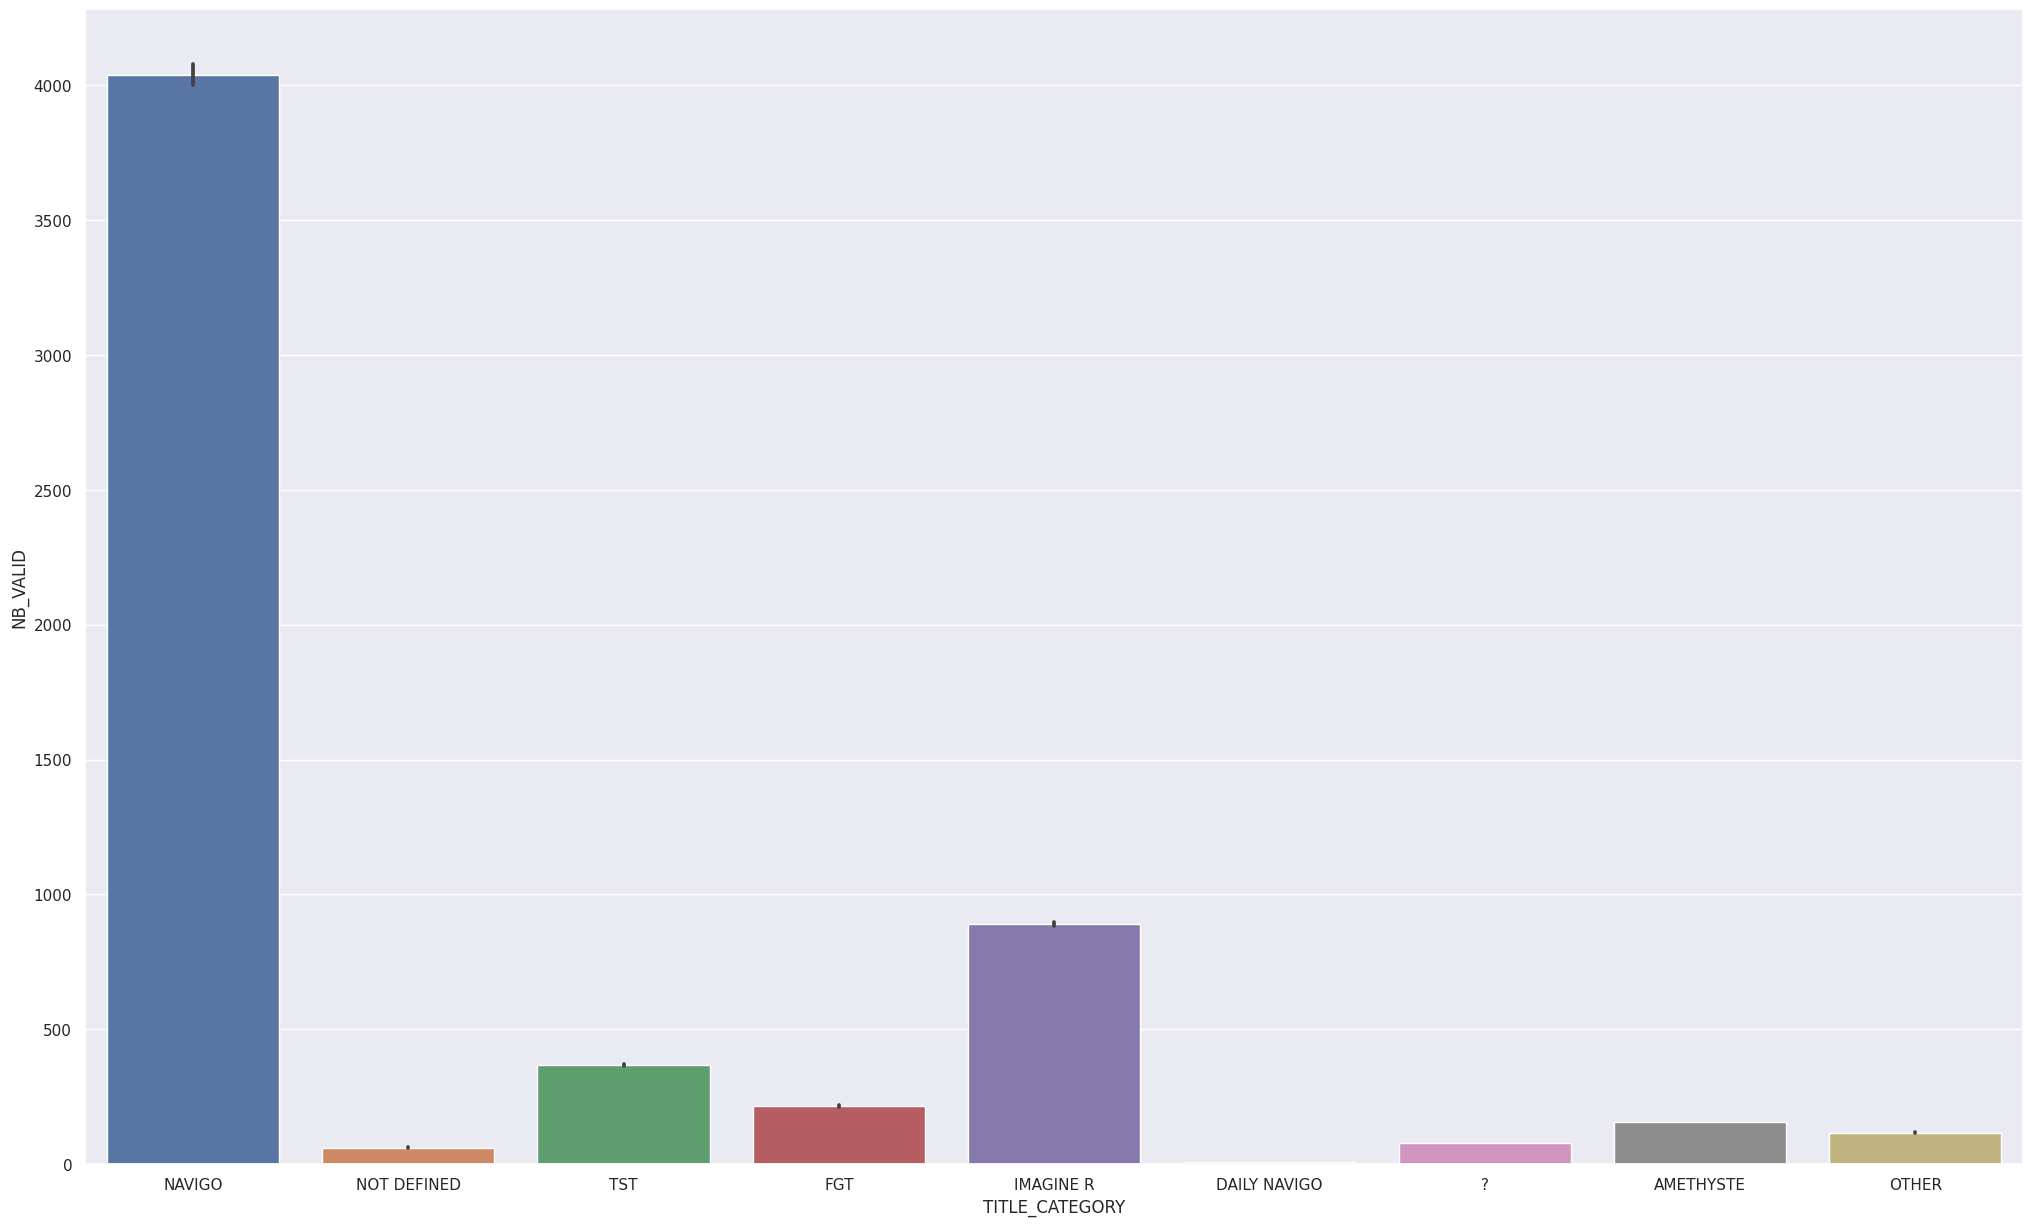

In [27]:
plt.figure(figsize=(25,15))
sns.barplot(data=data, x = data.TITLE_CATEGORY, y = data.NB_VALID)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847660 entries, 0 to 883957
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            847660 non-null  datetime64[ns]
 1   STATION_NAME    847660 non-null  object        
 2   ID_REFA_LDA     847660 non-null  float64       
 3   TITLE_CATEGORY  847660 non-null  object        
 4   NB_VALID        847660 non-null  int64         
 5   month           847660 non-null  int32         
 6   Day             847660 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 45.3+ MB


In [29]:
for x, y in enumerate(data.columns):
    print(x, y)

0 DATE
1 STATION_NAME
2 ID_REFA_LDA
3 TITLE_CATEGORY
4 NB_VALID
5 month
6 Day


In [30]:
l = data.NB_VALID.min() - 1
me = data.NB_VALID.quantile(0.25)
mh = data.NB_VALID.quantile(0.5)
h = data.NB_VALID.quantile(0.75)
maxx = data.NB_VALID.max()

binss = (l,me,mh,h,maxx)

data['NB_Category'] = pd.cut(data.NB_VALID, bins=binss, labels=[1,2,3,4])

In [31]:
data['TITLE_CATEGORY'].value_counts()

TITLE_CATEGORY
NAVIGO          112889
IMAGINE R       111258
TST             107852
FGT             107705
AMETHYSTE       105191
?               100001
DAILY NAVIGO     78011
NOT DEFINED      64837
OTHER            59916
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with categorical data
TITLE_CATEGORYy = pd.DataFrame({'TITLE_CATEGORY': ['NAVIGO', 'IMAGINE R','TST','FGT','AMETHYSTE','?','DAILY NAVIGO','NOT DEFINED','OTHER']})

print(f"Before Encoding the Data:\n\n{TITLE_CATEGORYy}\n")

Before Encoding the Data:

  TITLE_CATEGORY
0         NAVIGO
1      IMAGINE R
2            TST
3            FGT
4      AMETHYSTE
5              ?
6   DAILY NAVIGO
7    NOT DEFINED
8          OTHER



In [33]:
le = LabelEncoder()

# Fit and transform the categorical data
data['TITLE_CATEGORY'] = le.fit_transform(data['TITLE_CATEGORY'])

In [34]:
TITLE_CATEGORYy

,TITLE_CATEGORY
0,NAVIGO
1,IMAGINE R
2,TST
3,FGT
4,AMETHYSTE
5,?
6,DAILY NAVIGO
7,NOT DEFINED
8,OTHER


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847660 entries, 0 to 883957
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            847660 non-null  datetime64[ns]
 1   STATION_NAME    847660 non-null  object        
 2   ID_REFA_LDA     847660 non-null  float64       
 3   TITLE_CATEGORY  847660 non-null  int64         
 4   NB_VALID        847660 non-null  int64         
 5   month           847660 non-null  int32         
 6   Day             847660 non-null  int32         
 7   NB_Category     847660 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(1)
memory usage: 46.1+ MB


In [36]:
data.head()

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,month,Day,NB_Category
0,2019-07-21,LA TOUR MAUBOURG,71242.0,5,1141,7,21,4
1,2019-07-21,PARMENTIER,71801.0,6,5,7,21,1
2,2019-07-21,PARMENTIER,71801.0,8,97,7,21,3
3,2019-07-21,PEREIRE-LEVALLOIS,71453.0,3,53,7,21,2
5,2019-07-21,PICPUS,71639.0,3,25,7,21,2


In [37]:
data['NB_Category'] = pd.to_numeric(data.NB_Category)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847660 entries, 0 to 883957
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            847660 non-null  datetime64[ns]
 1   STATION_NAME    847660 non-null  object        
 2   ID_REFA_LDA     847660 non-null  float64       
 3   TITLE_CATEGORY  847660 non-null  int64         
 4   NB_VALID        847660 non-null  int64         
 5   month           847660 non-null  int32         
 6   Day             847660 non-null  int32         
 7   NB_Category     847660 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(1)
memory usage: 51.7+ MB


# Modeling

In [39]:
x = data.drop(labels=['DATE','STATION_NAME','NB_Category'], axis=1)
y = data.NB_Category

In [40]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40,shuffle=True)

In [42]:
print('Shape of the x_train data : ', x_train.shape)
print('Shape of the y_train data : ', y_train.shape)
print('Shape of the x_test data : ', x_test.shape)
print('Shape of the y_test data : ', y_test.shape)

Shape of the x_train data :  (762894, 5)
Shape of the y_train data :  (762894,)
Shape of the x_test data :  (84766, 5)
Shape of the y_test data :  (84766,)


In [43]:
model = Sequential([
    
Dense(1024, activation='relu'), 
BatchNormalization(),
Dense(512, activation='relu'), 
Dense(256, activation='relu'), 
Dense(256, activation='relu'), 
Dense(128, activation='relu'), 
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(5, activation = 'softmax')    
])

In [44]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [45]:
history = model.fit(x = x_train, y = y_train, epochs = 10 , validation_split=0.15, batch_size = 64)

Epoch 1/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - accuracy: 0.8453 - loss: 0.3468 - val_accuracy: 0.9473 - val_loss: 0.1198
Epoch 2/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 129s 13ms/step - accuracy: 0.9324 - loss: 0.1657 - val_accuracy: 0.9459 - val_loss: 0.1304
Epoch 3/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 128s 13ms/step - accuracy: 0.9401 - loss: 0.1504 - val_accuracy: 0.9608 - val_loss: 0.1067
Epoch 4/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 128s 13ms/step - accuracy: 0.9407 - loss: 0.1500 - val_accuracy: 0.9525 - val_loss: 0.1193
Epoch 5/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 130s 13ms/step - accuracy: 0.9461 - loss: 0.1384 - val_accuracy: 0.9588 - val_loss: 0.0886
Epoch 6/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 128s 13ms/step - accuracy: 0.9498 - loss: 0.1265 - val_accuracy: 0.9308 - val_loss: 0.1668
Epoch 7/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 131s 13ms/step - accuracy: 0.9587 - loss: 0.1055 - val_accuracy: 0.9589 - val_loss: 0.1036
Epoch 8/10
10133/10133 ━━━━━━━━━━━━━━━━━━━━ 131s 13ms/s

In [46]:
model.evaluate(x_test,y_test)

2649/2649 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9701 - loss: 0.0722


[0.07307197153568268, 0.9698935747146606]